In [22]:
#imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from src.data import load_insurance_data, basic_info
from src.features import encode_categoricals, prepare_features_target
from src.models import split_train_test, scale_features, train_linear_regression, train_random_forest
from src.utils import calculate_metrics, print_metrics


EDA

In [23]:
df = load_insurance_data("/Users/zarah/Downloads/insurance.csv")
print(f"build: {df.shape}")
df.head()

build: (1338, 7)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [25]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [26]:
info = basic_info(df)
print(f"Number of rows: {info['n_rows']}")
print(f"Number of columns: {info['n_cols']}")
print(f"Missing values: {info['missing_values']}")
print(f"Duplicate rows: {info['duplicates']}")

Number of rows: 1338
Number of columns: 7
Missing values: {'age': 0, 'sex': 0, 'bmi': 0, 'children': 0, 'smoker': 0, 'region': 0, 'charges': 0}
Duplicate rows: 1


Data Visualizations

/var/folders/zv/t5rm4bnj6xg3vwtyr0mfbz840000gn/T/ipykernel_47952/1874586528.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[0].legend()


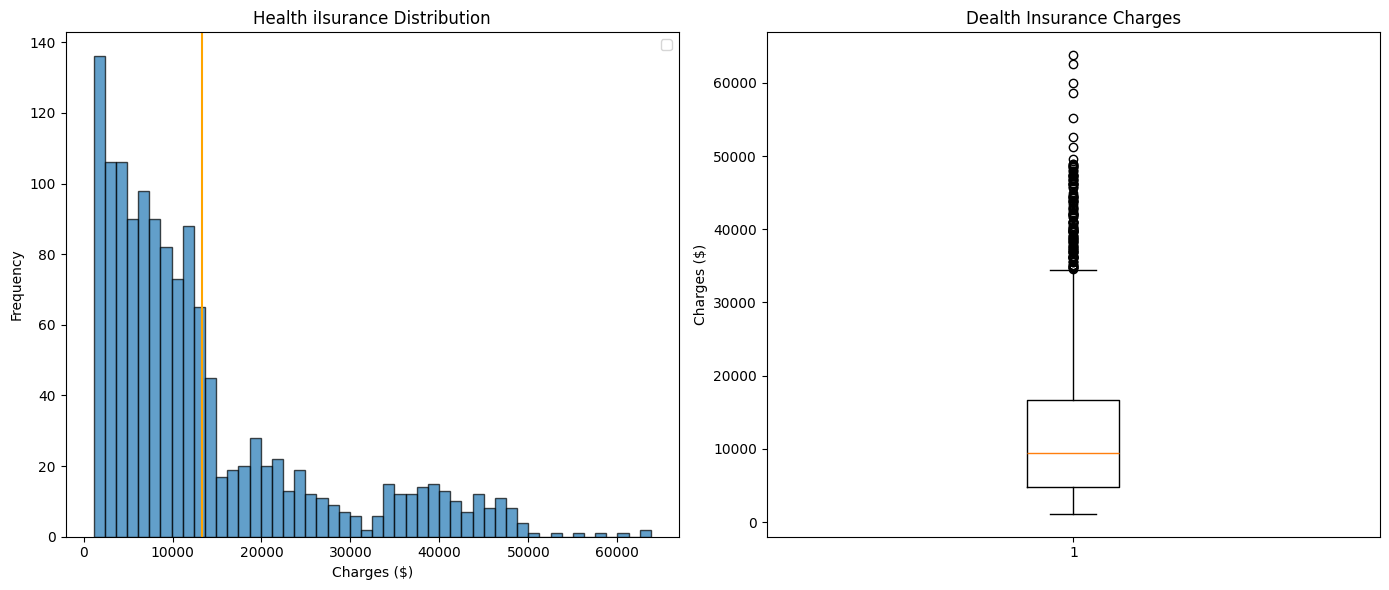

average charges: $13,270.42
median charges: $9,382.03
min charges: $1,121.87
max charges: $63,770.43


In [27]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

axes[0].hist(df['charges'], bins=50, edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Charges ($)')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Health iIsurance Distribution')
axes[0].axvline(df['charges'].mean(), color='orange')
axes[0].legend()

axes[1].boxplot(df['charges'])
axes[1].set_ylabel('Charges ($)')
axes[1].set_title('Dealth Insurance Charges')

plt.tight_layout()
plt.show()

print(f"average charges: ${df['charges'].mean():,.2f}")
print(f"median charges: ${df['charges'].median():,.2f}")
print(f"min charges: ${df['charges'].min():,.2f}")
print(f"max charges: ${df['charges'].max():,.2f}")

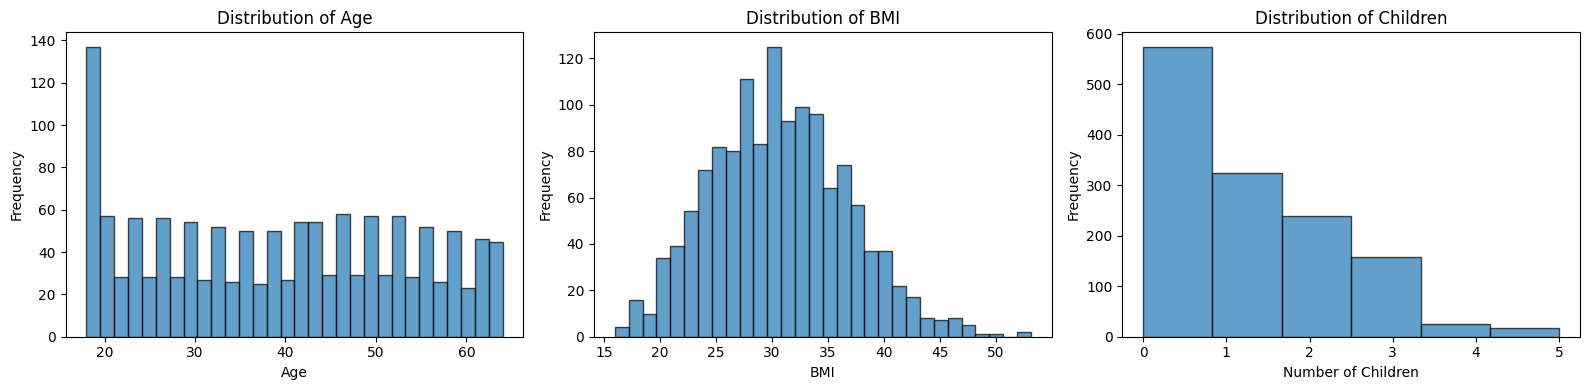

In [28]:
fig, axes = plt.subplots(1, 3, figsize=(16, 4))

axes[0].hist(df['age'], bins=30, edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Age')

axes[1].hist(df['bmi'], bins=30, edgecolor='black', alpha=0.7)
axes[1].set_xlabel('BMI')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Distribution of BMI')

axes[2].hist(df['children'], bins=6, edgecolor='black', alpha=0.7)
axes[2].set_xlabel('Number of Children')
axes[2].set_ylabel('Frequency')
axes[2].set_title('Distribution of Children')

plt.tight_layout()
plt.show()

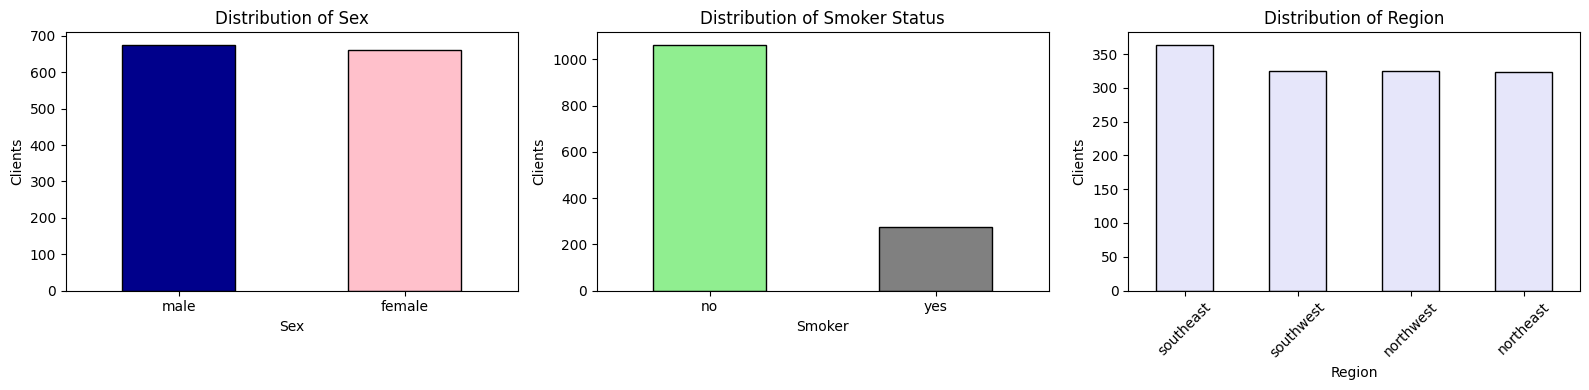

In [29]:
fig, axes = plt.subplots(1, 3, figsize=(16, 4))

df['sex'].value_counts().plot(kind='bar', ax=axes[0], color=['darkblue', 'pink'], edgecolor='black')
axes[0].set_xlabel('Sex')
axes[0].set_ylabel('Clients')
axes[0].set_title('Distribution of Sex')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=0)

df['smoker'].value_counts().plot(kind='bar', ax=axes[1], color=['lightgreen', 'grey'], edgecolor='black')
axes[1].set_xlabel('Smoker')
axes[1].set_ylabel('Clients')
axes[1].set_title('Distribution of Smoker Status')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=0)

df['region'].value_counts().plot(kind='bar', ax=axes[2], color='lavender', edgecolor='black')
axes[2].set_xlabel('Region')
axes[2].set_ylabel('Clients')
axes[2].set_title('Distribution of Region')
axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()

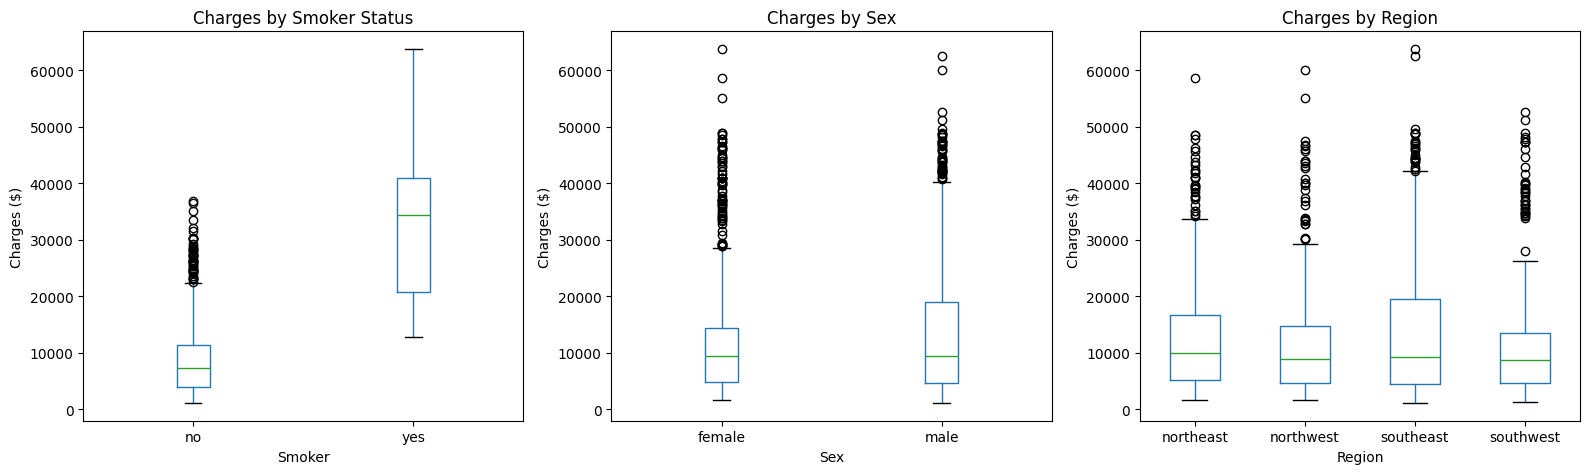

In [30]:
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

df.boxplot(column='charges', by='smoker', ax=axes[0])
axes[0].set_title('Charges by Smoker Status')
axes[0].set_xlabel('Smoker')
axes[0].set_ylabel('Charges ($)')
axes[0].grid(False)

df.boxplot(column='charges', by='sex', ax=axes[1])
axes[1].set_title('Charges by Sex')
axes[1].set_xlabel('Sex')
axes[1].set_ylabel('Charges ($)')
axes[1].grid(False)

df.boxplot(column='charges', by='region', ax=axes[2])
axes[2].set_title('Charges by Region')
axes[2].set_xlabel('Region')
axes[2].set_ylabel('Charges ($)')
axes[2].grid(False)

plt.suptitle('')
plt.tight_layout()
plt.show()

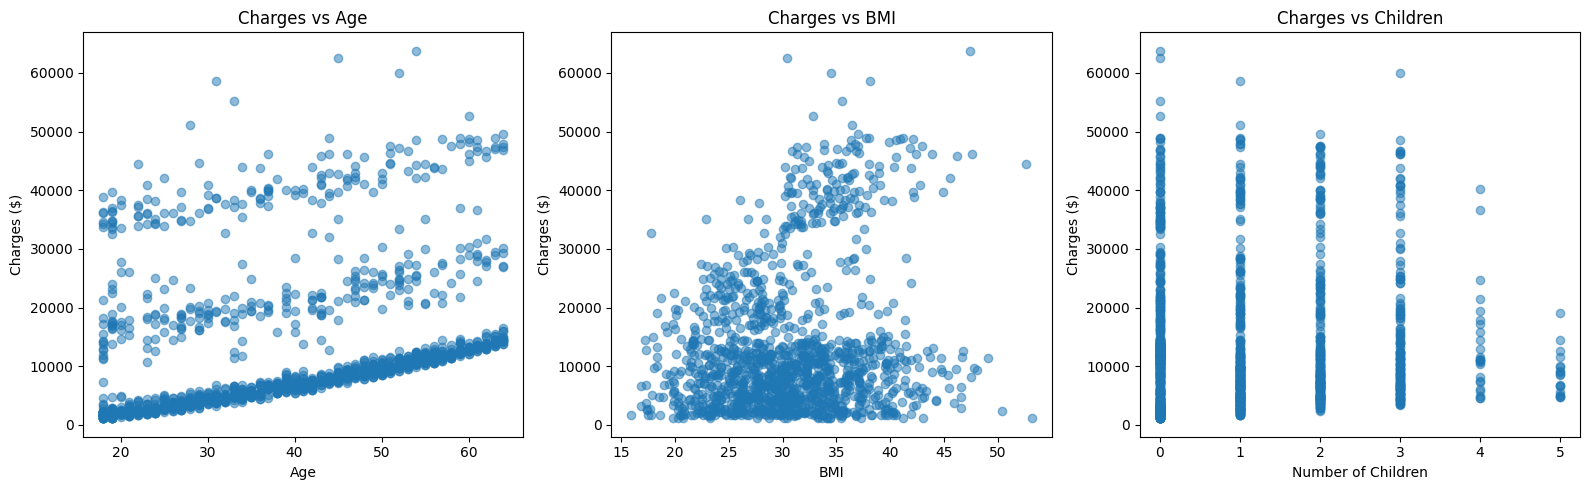

In [31]:
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

axes[0].scatter(df['age'], df['charges'], alpha=0.5)
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Charges ($)')
axes[0].set_title('Charges vs Age')

axes[1].scatter(df['bmi'], df['charges'], alpha=0.5)
axes[1].set_xlabel('BMI')
axes[1].set_ylabel('Charges ($)')
axes[1].set_title('Charges vs BMI')

axes[2].scatter(df['children'], df['charges'], alpha=0.5)
axes[2].set_xlabel('Number of Children')
axes[2].set_ylabel('Charges ($)')
axes[2].set_title('Charges vs Children')

plt.tight_layout()
plt.show()

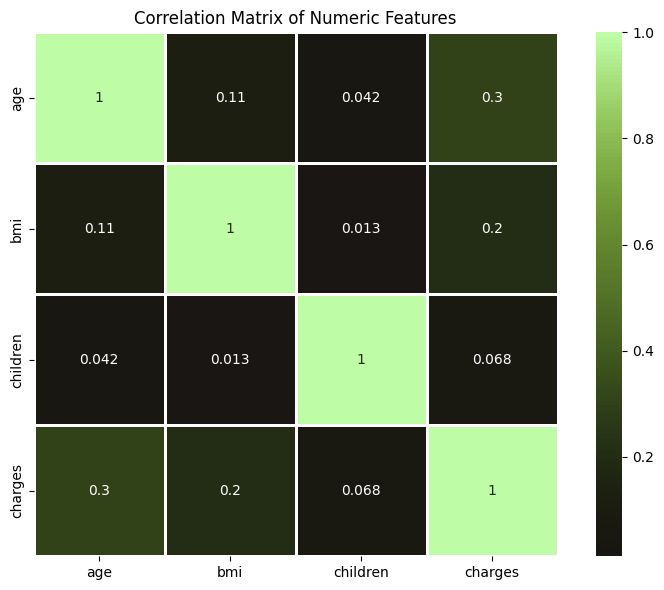

In [32]:
numeric_cols = ['age', 'bmi', 'children', 'charges']
correlation_matrix = df[numeric_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='vanimo', center=0, square=True, linewidths=1)
plt.title('Correlation Matrix of Numeric Features')
plt.tight_layout()
plt.show()

Data Preprocessing

In [ ]:
#x= independent variables, y=target variables (charges)
X, y = prepare_features_target(df, target_col="charges")
print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")

Features shape: (1338, 6)
Target shape: (1338,)


In [ ]:
#converts categories into a numeric value (0/1 columns)
X_encoded = encode_categoricals(X)
print(f"encoded feat shape: {X_encoded.shape}")
print(f"columns: {list(X_encoded.columns)}")

encoded feat shape: (1338, 8)
columns: ['age', 'bmi', 'children', 'sex_male', 'smoker_yes', 'region_northwest', 'region_southeast', 'region_southwest']


In [ ]:
#data is split into training (~80%) and testing (~20%)
X_train, X_test, y_train, y_test = split_train_test(X_encoded, y, test_size=0.2, random_state=42)

print(f"training set size: {len(X_train)}")
print(f"test set size: {len(X_test)}")

training set size: 1070
test set size: 268


In [ ]:
#feature scaling for linear regression
X_train_scaled, X_test_scaled, scaler = scale_features(X_train, X_test)

In [ ]:
#train the linear regression model
lr_model = train_linear_regression(X_train_scaled, y_train)

In [ ]:
#train the random forest model
rf_model = train_random_forest(X_train, y_train, n_estimators=100, random_state=42)

In [47]:
y_pred_lr = lr_model.predict(X_test_scaled)

metrics_lr = calculate_metrics(y_test, y_pred_lr)

print_metrics(metrics_lr)

MAE: 4181.194473753652
RMSE: 5796.284659276274
R2: 0.7835929767120722


In [48]:
y_pred_rf = rf_model.predict(X_test)

metrics_rf = calculate_metrics(y_test, y_pred_rf)

print_metrics(metrics_rf)


MAE: 2550.241127206659
RMSE: 4576.287233371472
R2: 0.8651041806198047


- Random Forest performs better (higher R², lower MAE/RMSE)
- expected fornonlinear insurance pricing

In [49]:
import joblib

joblib.dump(rf_model, "models/random_forest.joblib")

joblib.dump(scaler, "models/scaler.joblib")


['models/scaler.joblib']

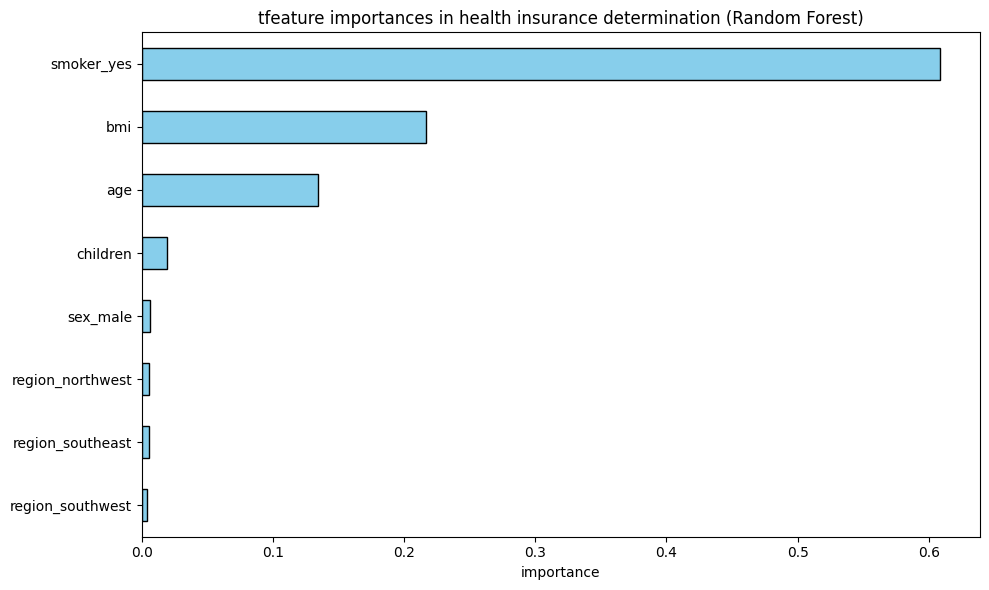


most important features in determining health insurance:
1. smoker_yes: 0.6086183616
2. bmi: 0.2165904228
3. age: 0.1341822737
4. children: 0.0194146238
5. sex_male: 0.0063793108
6. region_northwest: 0.0055691210
7. region_southeast: 0.0053172962
8. region_southwest: 0.0039285902


In [51]:
#feature importance plot
feature_importance = pd.Series(rf_model.feature_importances_, index=X_train.columns)
feature_importance_sorted = feature_importance.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
feature_importance_sorted.head(10).plot(kind='barh', color='skyblue', edgecolor='black')
plt.xlabel('importance')
plt.title('tfeature importances in health insurance determination (Random Forest)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

print("\nmost important features in determining health insurance:")
for i, (feature, importance) in enumerate(feature_importance_sorted.head(10).items(), 1):
    print(f"{i}. {feature}: {importance:.10f}")